In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('UK_Accident.csv')

In [23]:
for i in df.columns:
    print(i)

Unnamed: 0
Accident_Index
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Date
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
Junction_Control
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location
Year


In [24]:
df.isnull().sum()

Unnamed: 0                                          0
Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                              0
Longitude                                         101
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                 

In [25]:
df=df.dropna()

In [26]:
df.drop_duplicates()
df = df.drop(axis=1,columns=['LSOA_of_Accident_Location','Accident_Index'])

In [27]:
Location_DF = df[['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Local_Authority_(District)',
'Local_Authority_(Highway)']]
Location_DF.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Local_Authority_(District),Local_Authority_(Highway)
0,525680.0,178240.0,-0.191170,51.489096,12,E09000020
1,524170.0,181650.0,-0.211708,51.520075,12,E09000020
2,524520.0,182240.0,-0.206458,51.525301,12,E09000020
3,526900.0,177530.0,-0.173862,51.482442,12,E09000020
4,528060.0,179040.0,-0.156618,51.495752,12,E09000020


In [28]:
timeOfAccident_df = df[['Date','Time']]

In [29]:
accident_df = df.drop(axis=1,columns=['Unnamed: 0','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Local_Authority_(District)',
'Local_Authority_(Highway)','Date','Time','1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number'])

In [30]:
accident_df.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,1,2,1,1,3,Single carriageway,30,None,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005
1,1,3,1,1,4,Dual carriageway,30,Automatic traffic signal,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
2,1,3,2,1,5,Single carriageway,30,None,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005
3,1,3,1,1,6,Single carriageway,30,None,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005
4,1,3,1,1,2,Single carriageway,30,None,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005


In [31]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395848 entries, 0 to 1495360
Data columns (total 16 columns):
 #   Column                                       Non-Null Count    Dtype 
---  ------                                       --------------    ----- 
 0   Police_Force                                 1395848 non-null  int64 
 1   Accident_Severity                            1395848 non-null  int64 
 2   Number_of_Vehicles                           1395848 non-null  int64 
 3   Number_of_Casualties                         1395848 non-null  int64 
 4   Day_of_Week                                  1395848 non-null  int64 
 5   Road_Type                                    1395848 non-null  object
 6   Speed_limit                                  1395848 non-null  int64 
 7   Junction_Control                             1395848 non-null  object
 8   Light_Conditions                             1395848 non-null  object
 9   Weather_Conditions                           1395848 non-

In [32]:
accident_df['Junction_Control'].value_counts()

Giveway or uncontrolled     691400
None                        547692
Automatic traffic signal    146360
Stop Sign                     8179
Authorised person             2217
Name: Junction_Control, dtype: int64

In [33]:
accident_df['Carriageway_Hazards'].value_counts()

None                                       1371659
Other object in carriageway                  10304
Any animal (except a ridden horse)            7218
Pedestrian in carriageway (not injured)       3168
Involvement with previous accident            2031
Dislodged vehicle load in carriageway         1468
Name: Carriageway_Hazards, dtype: int64

In [34]:
accident_df = accident_df.drop(axis=1,columns=['Junction_Control','Carriageway_Hazards'])

In [35]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395848 entries, 0 to 1495360
Data columns (total 14 columns):
 #   Column                                       Non-Null Count    Dtype 
---  ------                                       --------------    ----- 
 0   Police_Force                                 1395848 non-null  int64 
 1   Accident_Severity                            1395848 non-null  int64 
 2   Number_of_Vehicles                           1395848 non-null  int64 
 3   Number_of_Casualties                         1395848 non-null  int64 
 4   Day_of_Week                                  1395848 non-null  int64 
 5   Road_Type                                    1395848 non-null  object
 6   Speed_limit                                  1395848 non-null  int64 
 7   Light_Conditions                             1395848 non-null  object
 8   Weather_Conditions                           1395848 non-null  object
 9   Road_Surface_Conditions                      1395848 non-

In [36]:
# accident_severity_df = pd.get_dummies(data=accident_df, columns=)

SyntaxError: invalid syntax (638631729.py, line 1)

In [37]:
s = (accident_df.dtypes == 'object')
object_cols = list(s[s].index)
object_cols.remove('Did_Police_Officer_Attend_Scene_of_Accident')
object_cols


['Road_Type',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site']

In [38]:
accident_severity_df = pd.get_dummies(data=accident_df, columns=object_cols)

In [39]:
accident_severity_df['Did_Police_Officer_Attend_Scene_of_Accident']=np.where(accident_severity_df['Did_Police_Officer_Attend_Scene_of_Accident']=="yes",1,0)

In [40]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395848 entries, 0 to 1495360
Data columns (total 43 columns):
 #   Column                                                                      Non-Null Count    Dtype
---  ------                                                                      --------------    -----
 0   Police_Force                                                                1395848 non-null  int64
 1   Accident_Severity                                                           1395848 non-null  int64
 2   Number_of_Vehicles                                                          1395848 non-null  int64
 3   Number_of_Casualties                                                        1395848 non-null  int64
 4   Day_of_Week                                                                 1395848 non-null  int64
 5   Speed_limit                                                                 1395848 non-null  int64
 6   Urban_or_Rural_Area                       

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(accident_severity_df.drop(axis=1,columns=['Accident_Severity']),
                                              accident_severity_df['Accident_Severity'],test_size=0.3,random_state=100)

In [42]:
X_train.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Road_Type_Dual carriageway,Road_Type_One way street,...,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic signal partly defective,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks
541118,52,2,1,6,60,2,0,2007,0,0,...,0,0,0,0,0,1,0,0,0,0
230482,4,2,1,3,50,2,0,2006,1,0,...,0,0,0,0,0,1,0,0,0,0
451570,14,2,1,1,40,1,0,2007,1,0,...,0,0,0,0,0,1,0,0,0,0
863115,52,2,2,5,60,2,0,2010,0,0,...,0,0,0,0,0,1,0,0,0,0
214374,1,2,1,2,30,1,0,2006,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
X_train.describe()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,Road_Type_Dual carriageway,Road_Type_One way street,...,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic signal partly defective,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks
count,977093.000000,977093.000000,977093.000000,977093.000000,977093.000000,977093.000000,977093.0,977093.000000,977093.000000,977093.000000,...,977093.000000,977093.000000,977093.000000,977093.000000,977093.000000,977093.000000,977093.00000,977093.000000,977093.000000,977093.000000
mean,25.451065,1.841221,1.353585,4.118447,38.804234,1.346819,0.0,2009.394282,0.147037,0.020401,...,0.006325,0.274927,0.000511,0.001797,0.003007,0.976043,0.00335,0.001512,0.002359,0.011422
std,19.364883,0.713787,0.829543,1.922715,14.044281,0.475958,0.0,3.017312,0.354143,0.141369,...,0.079277,0.446478,0.022593,0.042355,0.054753,0.152915,0.05778,0.038850,0.048513,0.106260
min,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.0,2005.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,1.000000,2.000000,30.000000,1.000000,0.0,2006.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
50%,22.000000,2.000000,1.000000,4.000000,30.000000,1.000000,0.0,2010.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,1.000000,6.000000,50.000000,2.000000,0.0,2012.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,98.000000,67.000000,87.000000,7.000000,70.000000,2.000000,0.0,2014.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [44]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [45]:
f_p_values

(array([6.62235360e+03, 1.88980949e+03, 3.81888440e+03, 5.20103525e+00,
        3.78241538e+04, 1.20197654e+03,            nan, 2.19270586e+00,
        5.64574011e+02, 7.26509259e+01, 1.82307620e+03, 4.78961548e+02,
        1.82607874e+02, 8.00098261e+01, 5.67724329e+03, 2.90627359e+00,
        3.45434160e+02, 2.37273432e+01, 7.92650051e+02, 3.61566251e+01,
        1.49800978e+02, 3.03232331e+01, 1.61826714e+02, 3.74002855e+00,
        3.50510509e+02, 9.70809099e+00, 1.28749924e+02, 2.85024777e+02,
        6.10057973e+01, 5.14216458e+00, 7.80739349e+01, 1.38256511e+01,
        9.24525809e+01, 8.25669151e+01, 3.25207711e+00, 2.20580278e+01,
        1.67026046e+01, 6.38971723e-01, 4.28876665e+01, 2.97956830e+00,
        1.55173188e+02, 9.32074896e+01]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.42351423e-002,
        0.00000000e+000, 9.86528583e-262,             nan, 3.34087304e-001,
        2.53694606e-123, 1.67514297e-016, 0.00000000e+000, 9.88146588e-105,
        2.

In [46]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

Police_Force                                                                   0.000000e+00
Number_of_Vehicles                                                             0.000000e+00
Number_of_Casualties                                                           0.000000e+00
Day_of_Week                                                                    7.423514e-02
Speed_limit                                                                    0.000000e+00
Urban_or_Rural_Area                                                           9.865286e-262
Did_Police_Officer_Attend_Scene_of_Accident                                             NaN
Year                                                                           3.340873e-01
Road_Type_Dual carriageway                                                    2.536946e-123
Road_Type_One way street                                                       1.675143e-16
Road_Type_Roundabout                                                           0

In [47]:
p_values.sort_index(ascending=False)

Year                                                                           3.340873e-01
Weather_Conditions_Unknown                                                     1.281316e-62
Weather_Conditions_Snowing without high winds                                  1.102324e-28
Weather_Conditions_Snowing with high winds                                     7.796772e-03
Weather_Conditions_Raining without high winds                                  7.719870e-77
Weather_Conditions_Raining with high winds                                     1.541215e-01
Weather_Conditions_Other                                                       7.240616e-36
Weather_Conditions_Fog or mist                                                 2.602517e-07
Weather_Conditions_Fine without high winds                                     2.958905e-33
Weather_Conditions_Fine with high winds                                        1.408279e-08
Urban_or_Rural_Area                                                           9.

<AxesSubplot:>

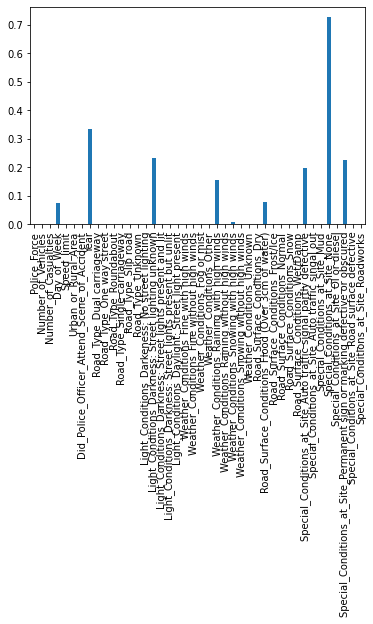

In [48]:
p_values.plot.bar()

In [49]:
# from sklearn.feature_selection import SelectKBest

# select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
# print('Score list:', select_feature.scores_)
# print('Feature list:', X_train.columns)

Score list: [6.62235360e+03 1.88980949e+03 3.81888440e+03 5.20103525e+00
 3.78241538e+04 1.20197654e+03            nan 2.19270586e+00
 5.64574011e+02 7.26509259e+01 1.82307620e+03 4.78961548e+02
 1.82607874e+02 8.00098261e+01 5.67724329e+03 2.90627359e+00
 3.45434160e+02 2.37273432e+01 7.92650051e+02 3.61566251e+01
 1.49800978e+02 3.03232331e+01 1.61826714e+02 3.74002855e+00
 3.50510509e+02 9.70809099e+00 1.28749924e+02 2.85024777e+02
 6.10057973e+01 5.14216458e+00 7.80739349e+01 1.38256511e+01
 9.24525809e+01 8.25669151e+01 3.25207711e+00 2.20580278e+01
 1.67026046e+01 6.38971723e-01 4.28876665e+01 2.97956830e+00
 1.55173188e+02 9.32074896e+01]
Feature list: Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Speed_limit', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year',
       'Road_Type_Dual carriageway', 'Road_Type_One way street',
       'Road_Type_Roundabout', 'Road_Type_Single carriageway',
       'Road_